# **PROYECTO CODERHOUSE: DIAGNOSTIC AIDS**

### Librerias utilizadas

In [2]:
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.display.max_columns = 50

### Rutas y bases de datos
https://www.kaggle.com/datasets/aadarshvelu/aids-virus-infection-prediction/data  

In [3]:
# Obtener el dataframe desde el repsitorio de GitHub
data_aids = url = 'https://raw.githubusercontent.com/jhios98/data_science_fundamentals/main/AIDS_Classification_5000.csv'
data_aids = pd.read_csv(data_aids, sep=',' )

## **DATASET DIAGNOSTIC AIDS**
**Context:**  
Dataset contains healthcare statistics and categorical information about patients who have been diagnosed with AIDS.
This dataset was initially published in 1996.

**Attribute Information:**  
**time:** time to failure or censoring  
**trt:** treatment indicator (0 = ZDV only; 1 = ZDV + ddI, 2 = ZDV + Zal, 3 = ddI only)  
**age:** age (yrs) at baseline  
**wtkg:** weight (kg) at baseline  
**hemo:** hemophilia (0=no, 1=yes)  
**homo:** homosexual activity (0=no, 1=yes)  
**drugs:** history of IV drug use (0=no, 1=yes)  
**karnof:** Karnofsky score (on a scale of 0-100)  
**oprior:** Non-ZDV antiretroviral therapy pre-175 (0=no, 1=yes)  
**z30:** ZDV in the 30 days prior to 175 (0=no, 1=yes)  
**preanti:** days pre-175 anti-retroviral therapy  
**race:** race (0=White, 1=non-white)  
**gender:** gender (0=F, 1=M)  
**str2:** antiretroviral history (0=naive, 1=experienced)  
**strat:** antiretroviral history stratification (1='Antiretroviral Naive',2='> 1 but <= 52 weeks of prior antiretroviral therapy',3='> 52 weeks)  
**symptom:** symptomatic indicator (0=asymp, 1=symp)   
**treat:** treatment indicator (0=ZDV only, 1=others)  
**offtrt:** indicator of off-trt before 96+/-5 weeks (0=no,1=yes)  
**cd40:** CD4 at baseline  
**cd420:** CD4 at 20+/-5 weeks  
**cd80:** CD8 at baseline  
**cd820:** CD8 at 20+/-5 weeks  
**infected:** is infected with AIDS (0=No, 1=Yes)  

**Additional Variable Information:**  
Personal information (age, weight, race, gender, sexual activity)  
Medical history (hemophilia, history of IV drugs)  
Treatment history (ZDV/non-ZDV treatment history)  
Lab results (CD4/CD8 counts)  

El conjunto de datos del estudio 175 del AIDS Clinical Trials Group contiene estadísticas de atención médica e información categórica sobre pacientes a los que se les ha diagnosticado SIDA. Este conjunto de datos se publicó inicialmente en 1996. El objetivo principal del proyecto es la utilización de la información del set para la predicción de infección del síndrome de inmunodeficiencia adquirida a partir de las diferentes variables principalmente de naturaleza categórica recolectada para 5000 individuos. Entre estas variables se tiene el peso del individuo ‘wtkg’, el tiempo en días antes de la insuficiencia hepática ‘time’, actividad homosexual ‘homo’, genero ‘gender’, raza ‘race’ entre otras. 

Dentro del análisis se espera determinar cuales son las variables que presentan una mayor correlación o incidencia en la determinación de la infección del SIDA para un paciente, también se espera evaluar si aquellas variables que a priori se pueden interpretar cómo generadoras o causales, como la actividad sexual del paciente o la utilización de drogas mediante la inyección, son en efecto las de mayor incidencia o estadísticamente significativas en la determinación de la infección.  Así mismo, se busca construir un modelo que permita predecir la probabilidad de infección a partir de un grupo de variables y medir la eficacia de este mediante la utilización de diferentes métricas. 


In [4]:
print(f'Dimensión del DataFrame {data_aids.shape}')
data_aids.columns

Dimensión del DataFrame (5000, 23)


Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')

In [5]:
nulos = data_aids.isnull().sum()
nulos

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [6]:
data_aids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      5000 non-null   int64  
 1   trt       5000 non-null   int64  
 2   age       5000 non-null   int64  
 3   wtkg      5000 non-null   float64
 4   hemo      5000 non-null   int64  
 5   homo      5000 non-null   int64  
 6   drugs     5000 non-null   int64  
 7   karnof    5000 non-null   int64  
 8   oprior    5000 non-null   int64  
 9   z30       5000 non-null   int64  
 10  preanti   5000 non-null   int64  
 11  race      5000 non-null   int64  
 12  gender    5000 non-null   int64  
 13  str2      5000 non-null   int64  
 14  strat     5000 non-null   int64  
 15  symptom   5000 non-null   int64  
 16  treat     5000 non-null   int64  
 17  offtrt    5000 non-null   int64  
 18  cd40      5000 non-null   int64  
 19  cd420     5000 non-null   int64  
 20  cd80      5000 non-null   int6

In [7]:
data_aids.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,881.382400,1.375200,34.239800,75.941660,0.033000,0.648000,0.137000,96.893400,0.040600,0.64020,318.906000,0.292200,0.850200,0.574400,1.94400,0.081400,0.730800,0.334200,319.791600,436.361600,1048.853000,906.292000,0.31580
std,303.774994,1.235609,6.985732,12.448553,0.178654,0.477642,0.343882,5.013608,0.197381,0.47999,401.655122,0.454819,0.356911,0.494483,0.89321,0.273476,0.443588,0.471757,102.370123,141.871757,491.375973,340.454917,0.46488
min,124.000000,0.000000,12.000000,44.424990,0.000000,0.000000,0.000000,78.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,115.000000,119.000000,252.000000,236.000000,0.00000
25%,552.000000,0.000000,29.000000,68.039777,0.000000,0.000000,0.000000,90.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,236.000000,325.000000,712.000000,649.000000,0.00000
50%,1044.500000,1.000000,34.000000,74.009940,0.000000,1.000000,0.000000,100.000000,0.000000,1.00000,135.000000,0.000000,1.000000,1.000000,2.00000,0.000000,1.000000,0.000000,298.000000,416.000000,891.000000,858.000000,0.00000
75%,1136.000000,3.000000,39.000000,81.224572,0.000000,1.000000,0.000000,100.000000,0.000000,1.00000,498.250000,1.000000,1.000000,1.000000,3.00000,0.000000,1.000000,1.000000,398.000000,526.000000,1243.250000,1075.000000,1.00000
max,1231.000000,3.000000,62.000000,142.881280,1.000000,1.000000,1.000000,100.000000,1.000000,1.00000,2351.000000,1.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,716.000000,1104.000000,4922.000000,3055.000000,1.00000


En la tabla anterior es posible determinar que la mayoría de las variables son de tipo categórico, por lo que no se encuentra demasiada utilidad en el .describe(), es por ello por lo que a continuación se realiza una división por tipo de variable para su posterior análisis y recodificación. 

In [8]:
# Variables categóricas.
var_categ = ['trt','hemo','homo','drugs','oprior','z30','race','strat',
             'gender','str2','symptom','treat','infected','offtrt']

# Variables continuas.
var_continuas = ['time','age','wtkg','karnof','preanti',
                 'cd40','cd420','cd80','cd820']

In [9]:
data_aids[var_continuas].describe()

,time,age,wtkg,karnof,preanti,cd40,cd420,cd80,cd820
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,881.382400,34.239800,75.941660,96.893400,318.906000,319.791600,436.361600,1048.853000,906.292000
std,303.774994,6.985732,12.448553,5.013608,401.655122,102.370123,141.871757,491.375973,340.454917
min,124.000000,12.000000,44.424990,78.000000,0.000000,115.000000,119.000000,252.000000,236.000000
25%,552.000000,29.000000,68.039777,90.000000,0.000000,236.000000,325.000000,712.000000,649.000000
50%,1044.500000,34.000000,74.009940,100.000000,135.000000,298.000000,416.000000,891.000000,858.000000
75%,1136.000000,39.000000,81.224572,100.000000,498.250000,398.000000,526.000000,1243.250000,1075.000000
max,1231.000000,62.000000,142.881280,100.000000,2351.000000,716.000000,1104.000000,4922.000000,3055.000000


Al revisar el resumen estadístico de las variables continuas se encuentra que las para la edad, el peso y la puntuación de Karnofsky (es la forma típica de medir la capacidad de los pacientes con cáncer de realizar tareas rutinarias. Los puntajes de la escala de rendimiento de Karnofsky oscilan entre 0 y 100) no presentan variaciones significativas, es decir, la desviación estándar para estas variables no es muy grande, sin embargo, para variables como el tiempo antes de la insuficiencia hepática, los días previos a la terapia antirretroviral 175 y la cantidad de linfocitos T (cd4 y cd8) presentan valores mucho más altos 

## **EDA EXPLORATORY DATA ANALYTICS**
### **COUNPLOT VARIABLES CATEGÓRICAS**

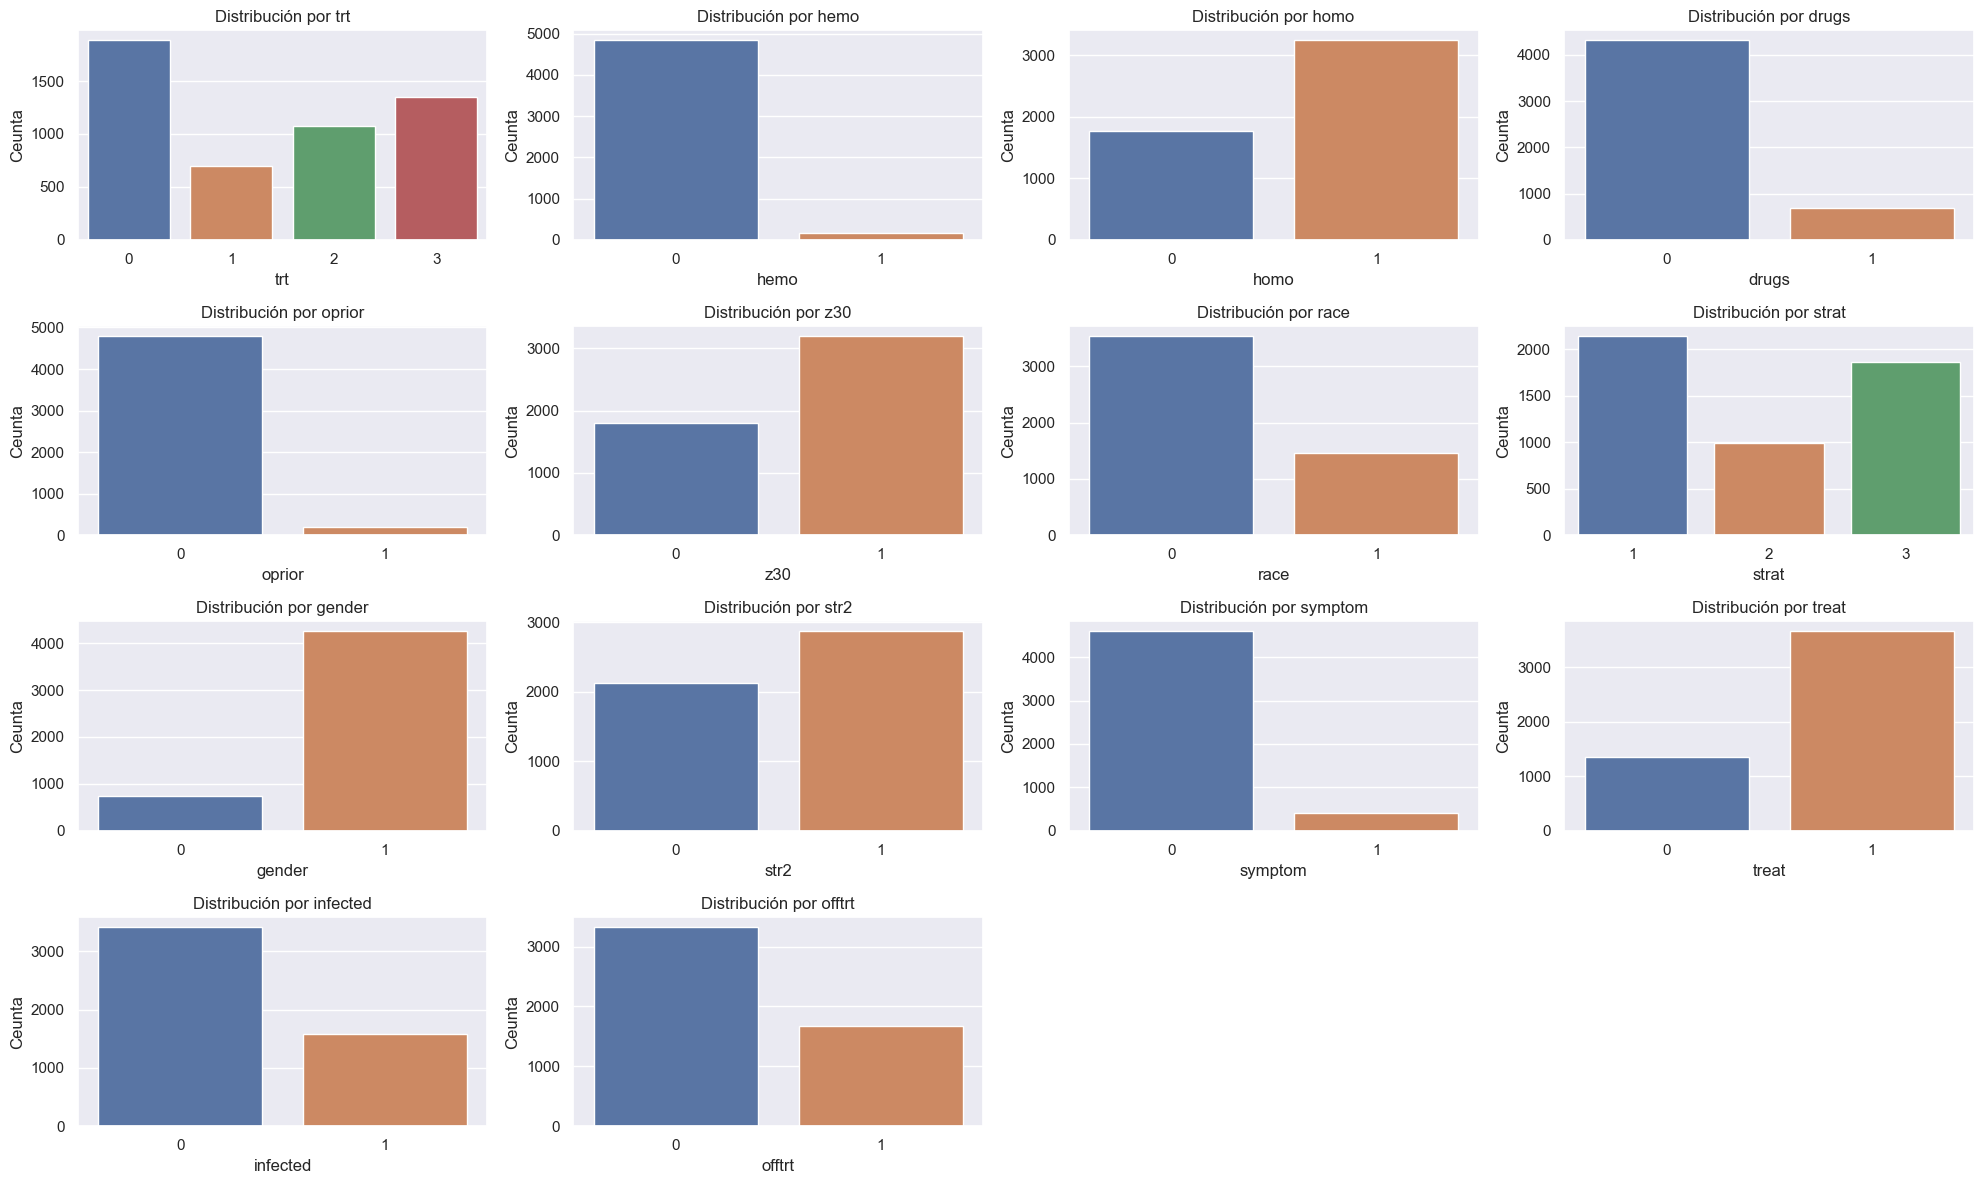

In [10]:
num_vars = len(var_categ)
ncols = math.ceil(math.sqrt(num_vars))
nrows = math.ceil(num_vars / ncols)

sns.set(style="darkgrid")
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 12))
axes = axes.flatten()

for i, var in enumerate(var_categ):
    sns.countplot(data=data_aids, x=var, ax=axes[i])
    axes[i].set_title(f'Distribución por {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Ceunta')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

En el apartado anterior, mediante un ciclo for, se realiza un gráfico de barras para cada una de las variables categóricas y se imprime dentro del mismo plot. Aquí se evidencia que, a diferencia de las variables 'strat', 'strat2' y 'trt', las demás características presentan una marcada concentración en algunas categorías en particular. En las variables 'symtom', 'hemo' y 'oprior' se muestra una muy alta concentración en la categoría 0, lo que se traduce en un fuerte desequilibrio y probables incidencias de sesgo en las predicciones. También se evidencia que, para la variable objetivo del análisis 'infected', se encuentra un problema de desbalanceo, donde predominan los casos de infección negativa, lo que también puede significar un problema en el entrenamiento de algún tipo de modelo.

### **HISTOGRAMAS VARIABLES CONTINUAS**

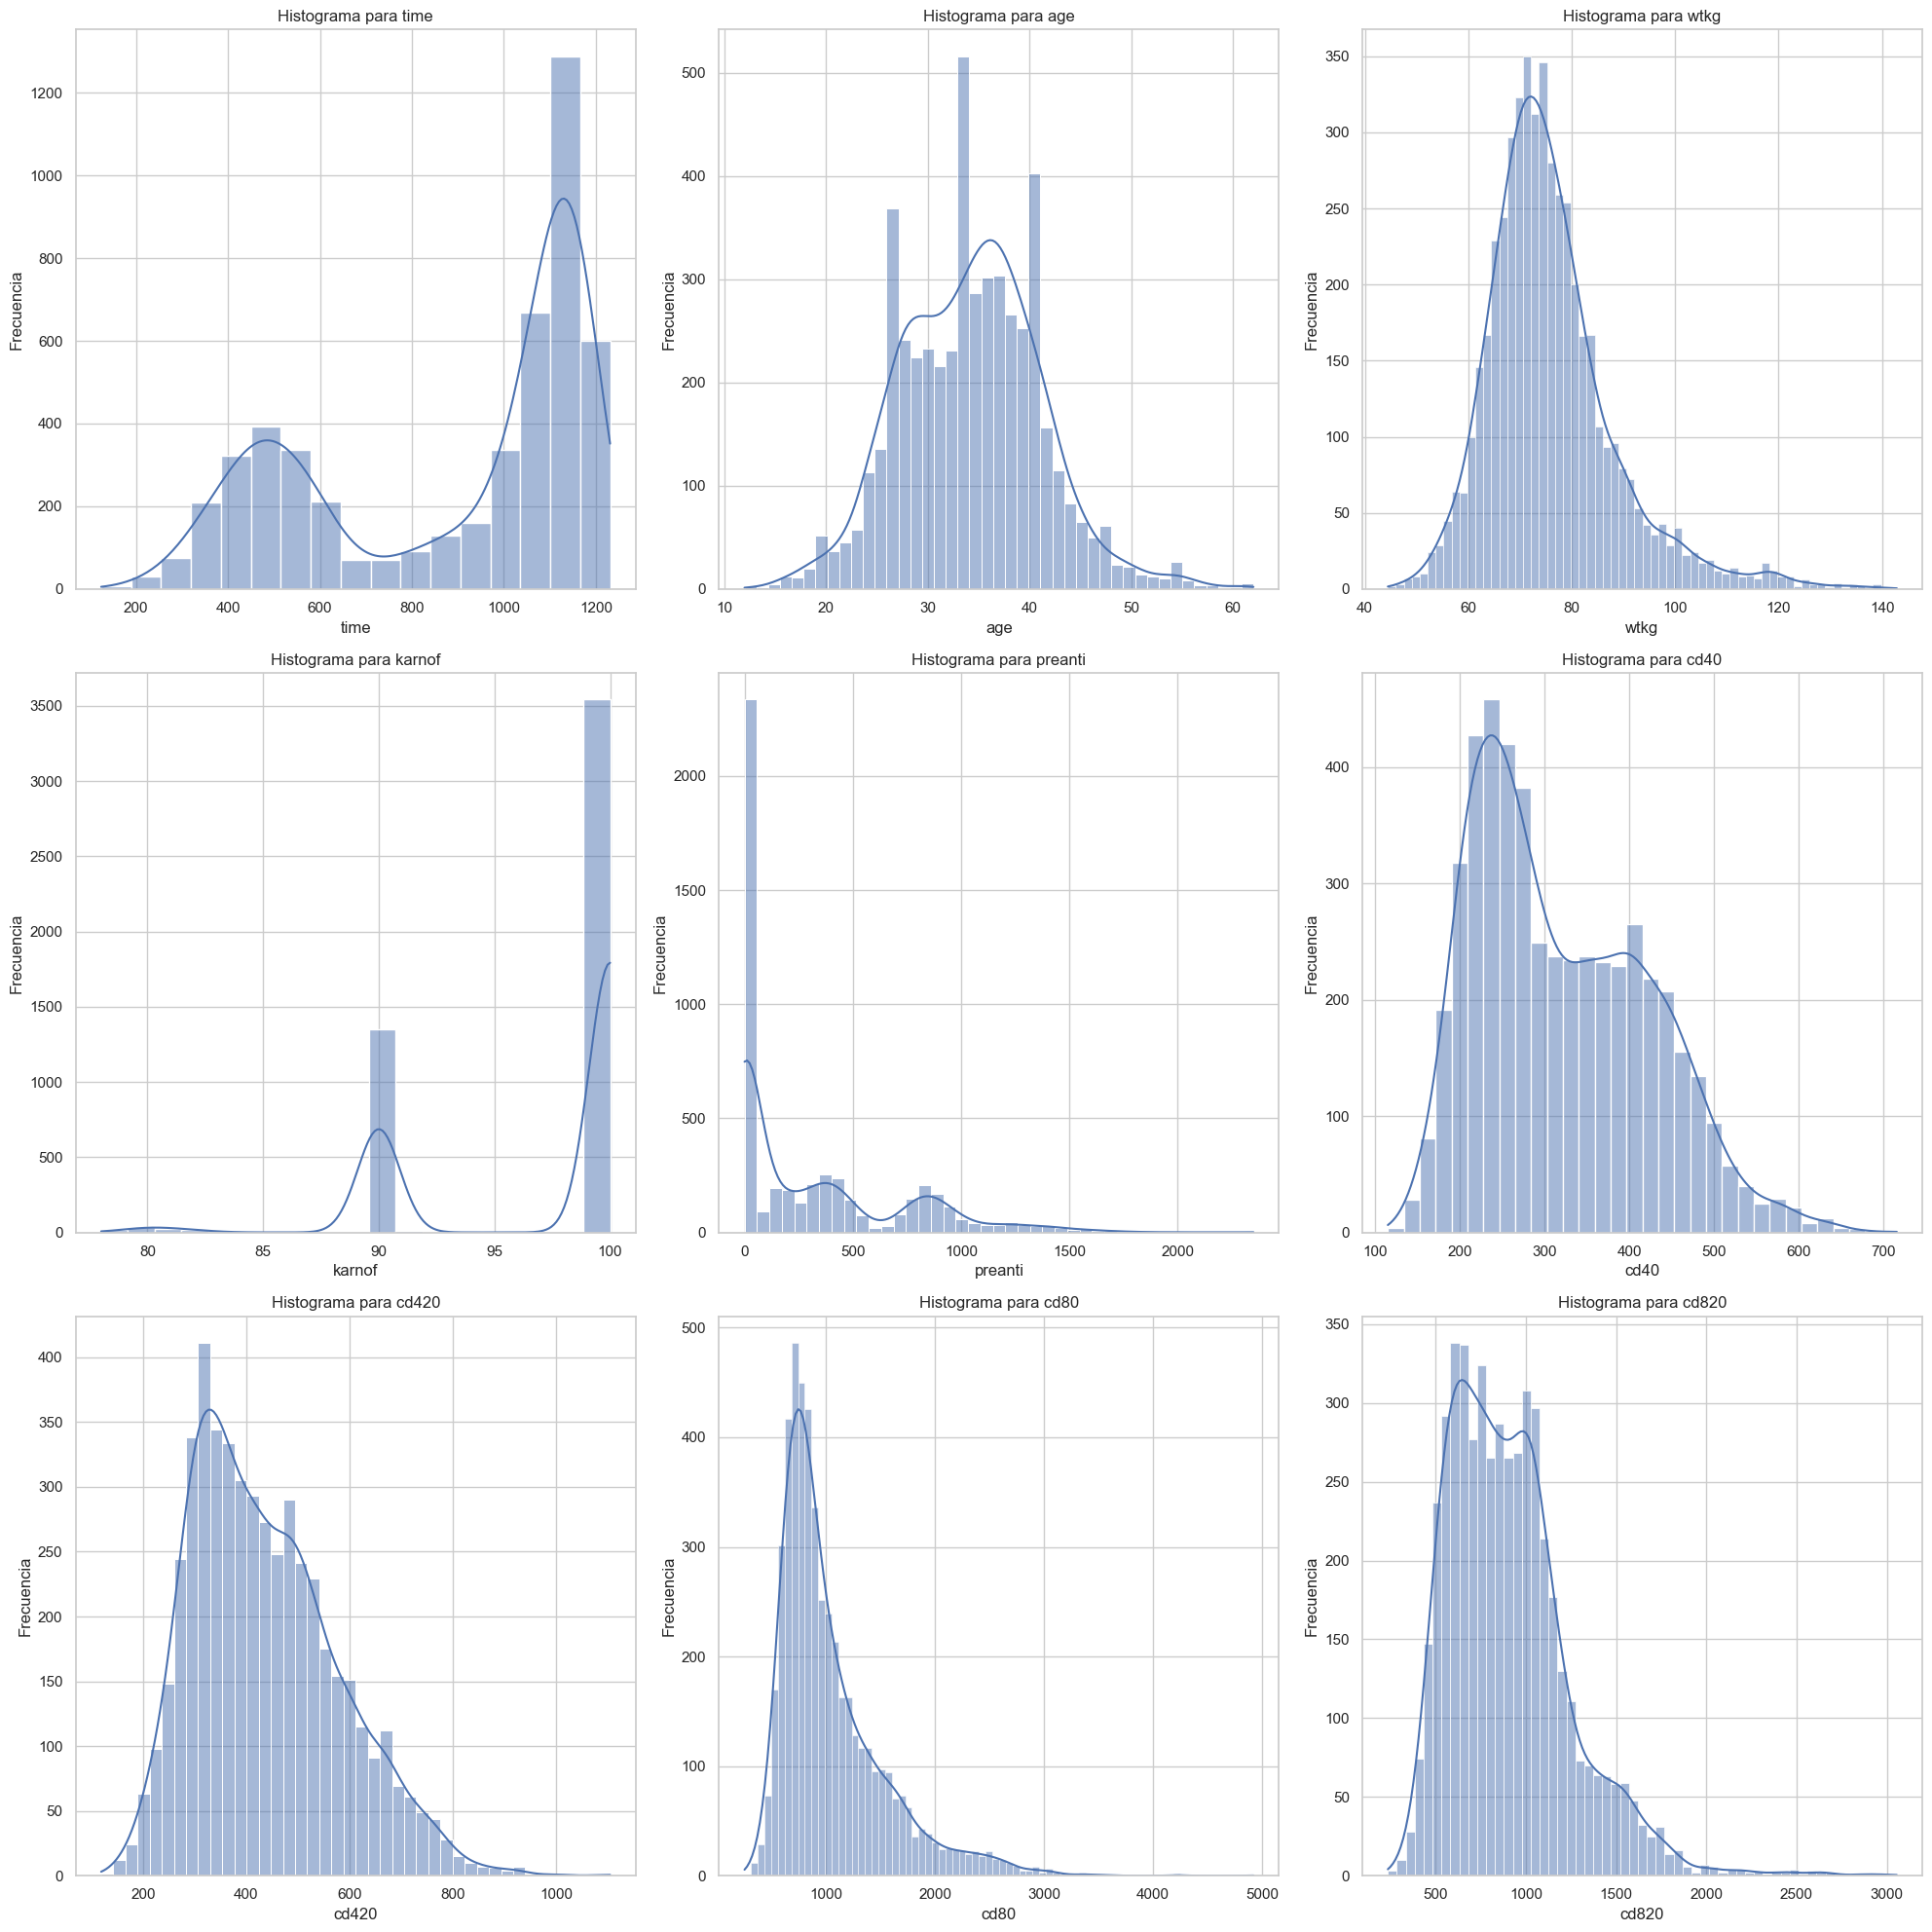

In [11]:
num_vars = len(var_continuas)
ncols = math.ceil(math.sqrt(num_vars))
nrows = math.ceil(num_vars / ncols)

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
axes = axes.flatten()

# Iterar sobre las variables continuas y crear un histograma para cada una
for i, var in enumerate(var_continuas):
    sns.histplot(data=data_aids, x=var, ax=axes[i], kde=True)
    axes[i].set_title(f'Histograma para {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

# Eliminar ejes no utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para evitar la superposición
plt.tight_layout()

# Mostrar el plot
plt.show()

En este apartado se realiza un histograma para cada una de las variables continuas del conjunto de datos. Aquí se logra identificar que la variable 'age' presenta un apuntalamiento o concentración entre los 30 y 40 años, mientras que el peso se encuentra concentrado entre los valores de 70 a 80 kilogramos. La variable 'time' no tiene un único intervalo de concentración, pero sí uno visualmente mayor entre los 1000 y 1200 días. La variable 'karnof' tiene concentraciones muy marcadas en los valores de 90 y 10, y algunos registros alrededor de 80 puntos, mientras que la variable 'preanti' está muy acentuada en 0. Para las variables de la cantidad de linfocitos, se logra evidenciar de manera general un apuntalamiento entre los valores bajos y medios con algunos registros muy altos, lo que permite visualizar una asimetría positiva de las distribuciones. De manera global, es posible determinar que las variables no siguen una distribución normal y, por ende, presentan marcadas asimetrías.

A continuación, se realiza la misma grafica de histogramas con la diferencia que se añade las categorías de 'infected', sin embargo, no se evidencian grandes diferencias en la distribución de los datos de acuerdo a las categorías de la variable objetivo. 

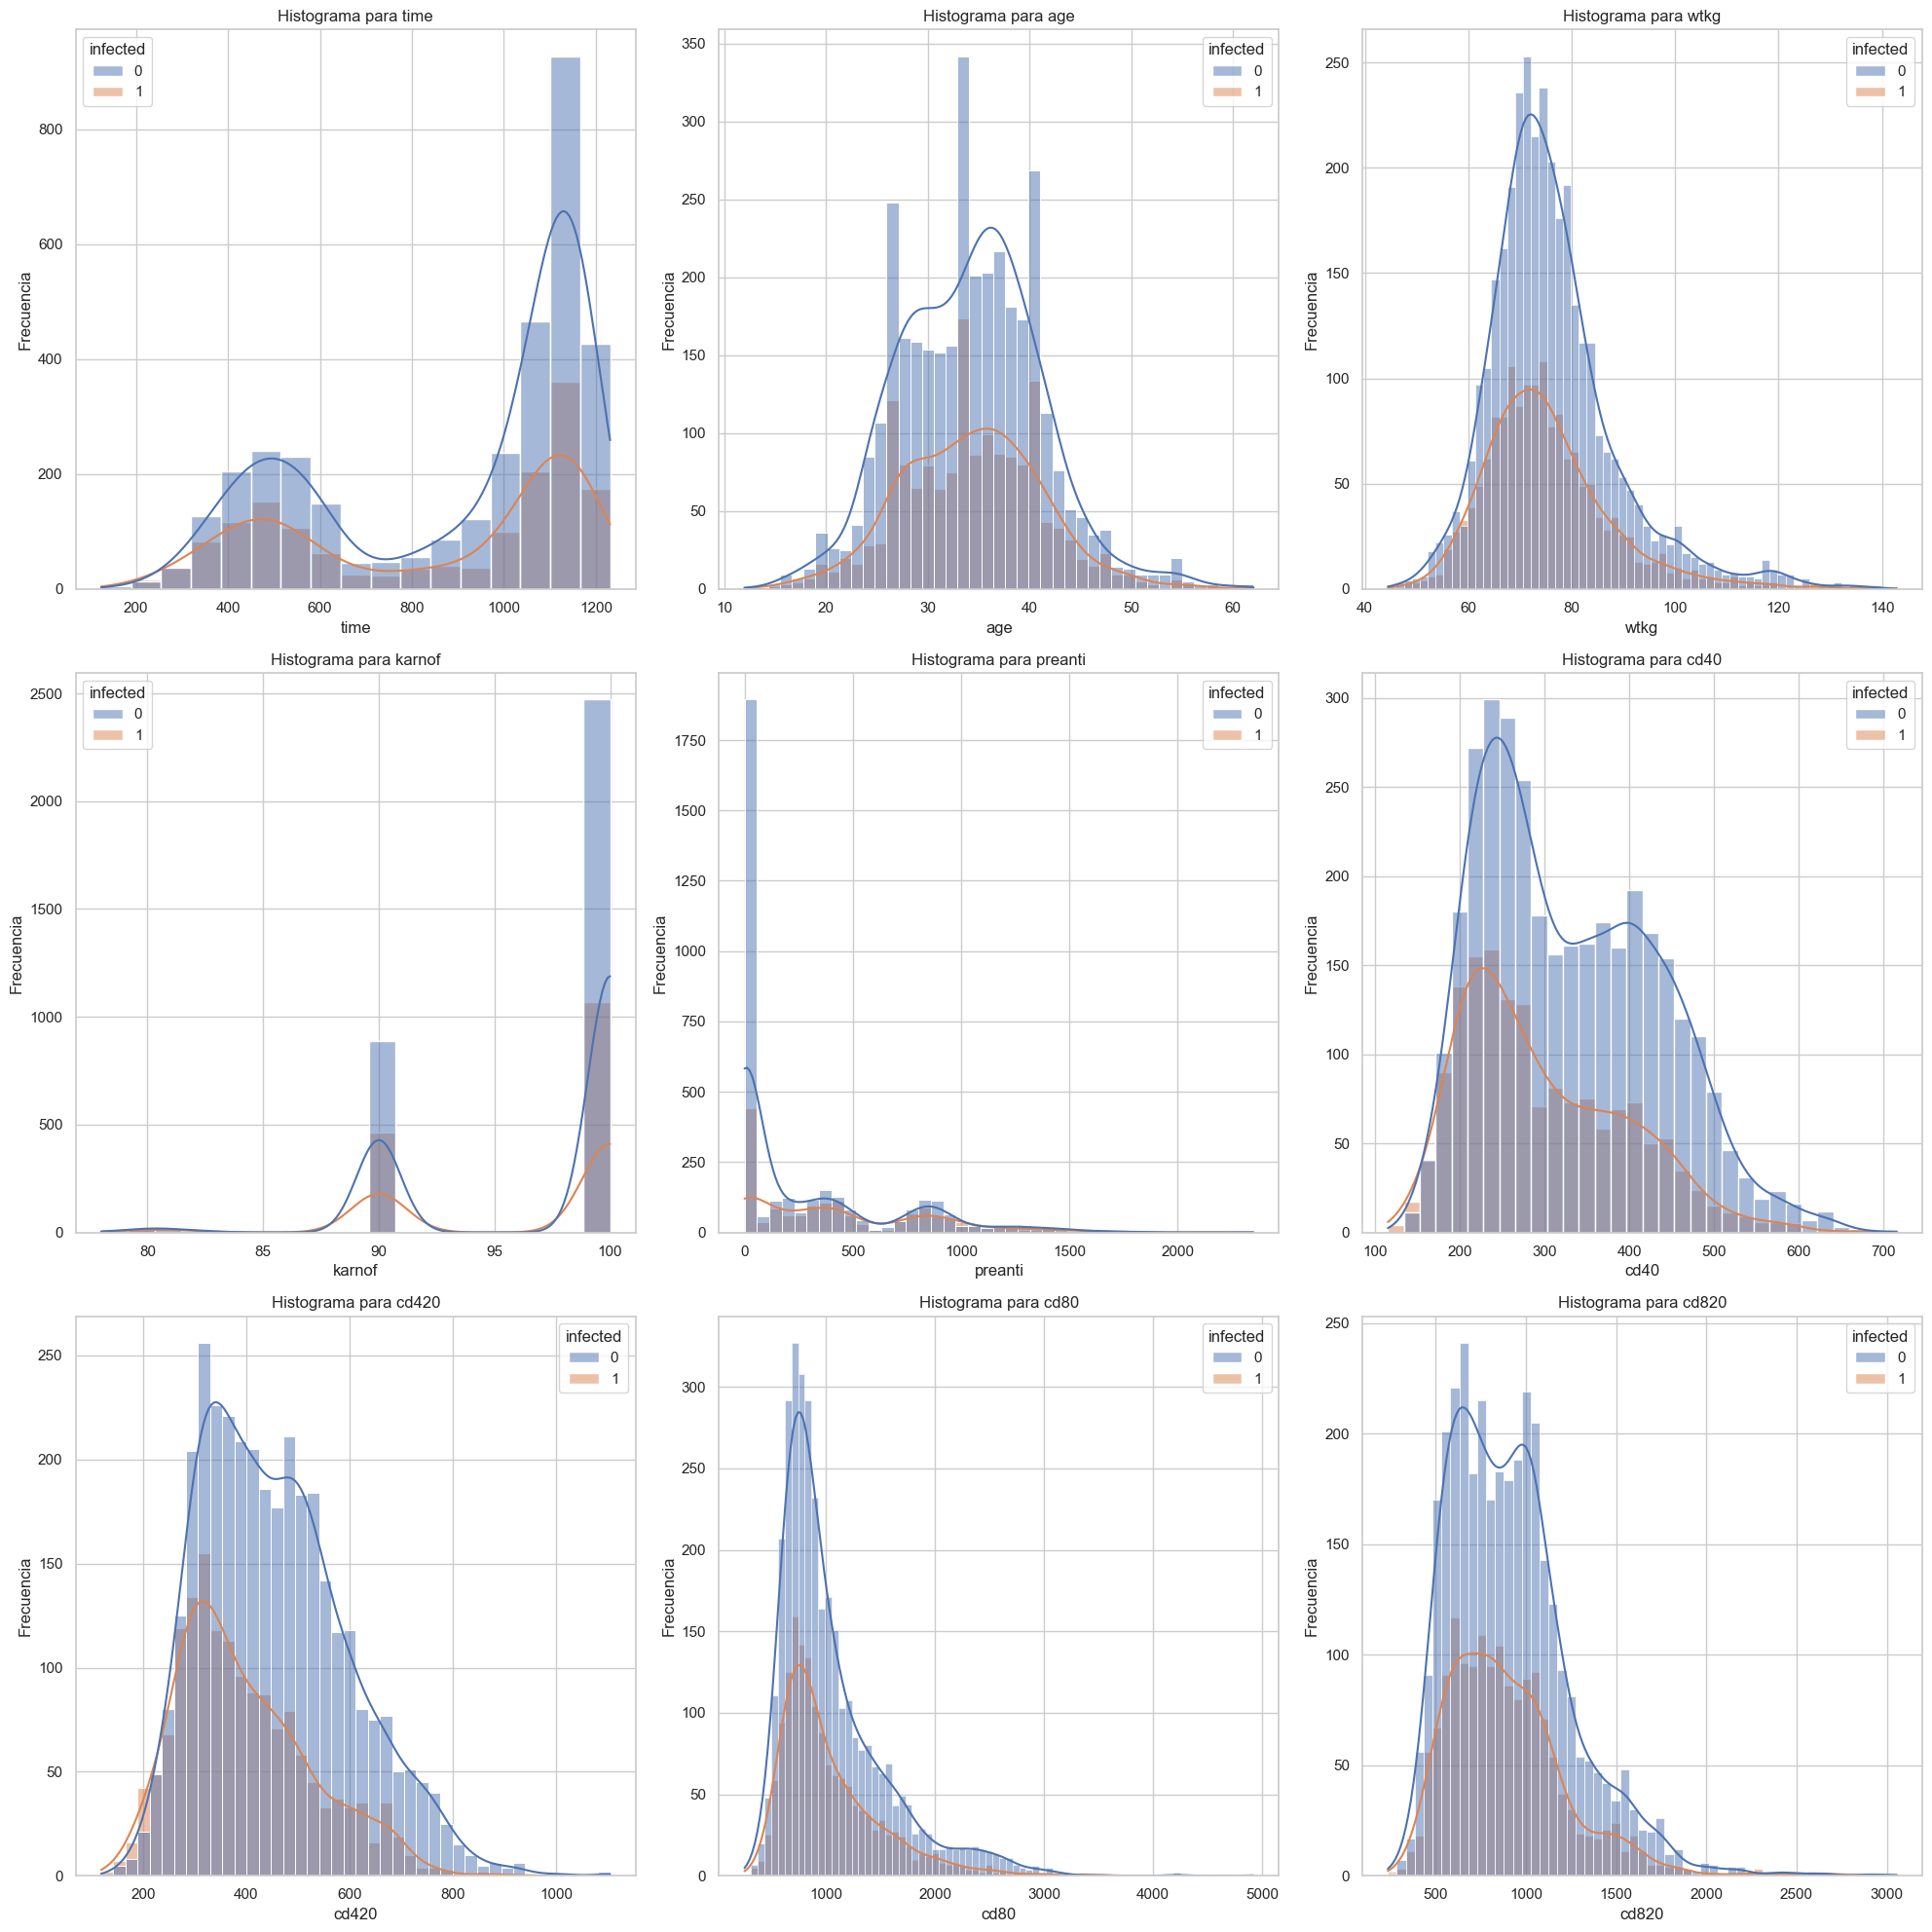

In [12]:
num_vars = len(var_continuas)
ncols = math.ceil(math.sqrt(num_vars))
nrows = math.ceil(num_vars / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
axes = axes.flatten()

for i, var in enumerate(var_continuas):
    sns.histplot(data=data_aids,hue='infected', x=var, ax=axes[i], kde=True)
    axes[i].set_title(f'Histograma para {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

### **BOXPLOTS VARIABLES CONTINUAS POR VALOR DE INFECCION (1= INFECTADO, 0 = nO INFECTADO)**

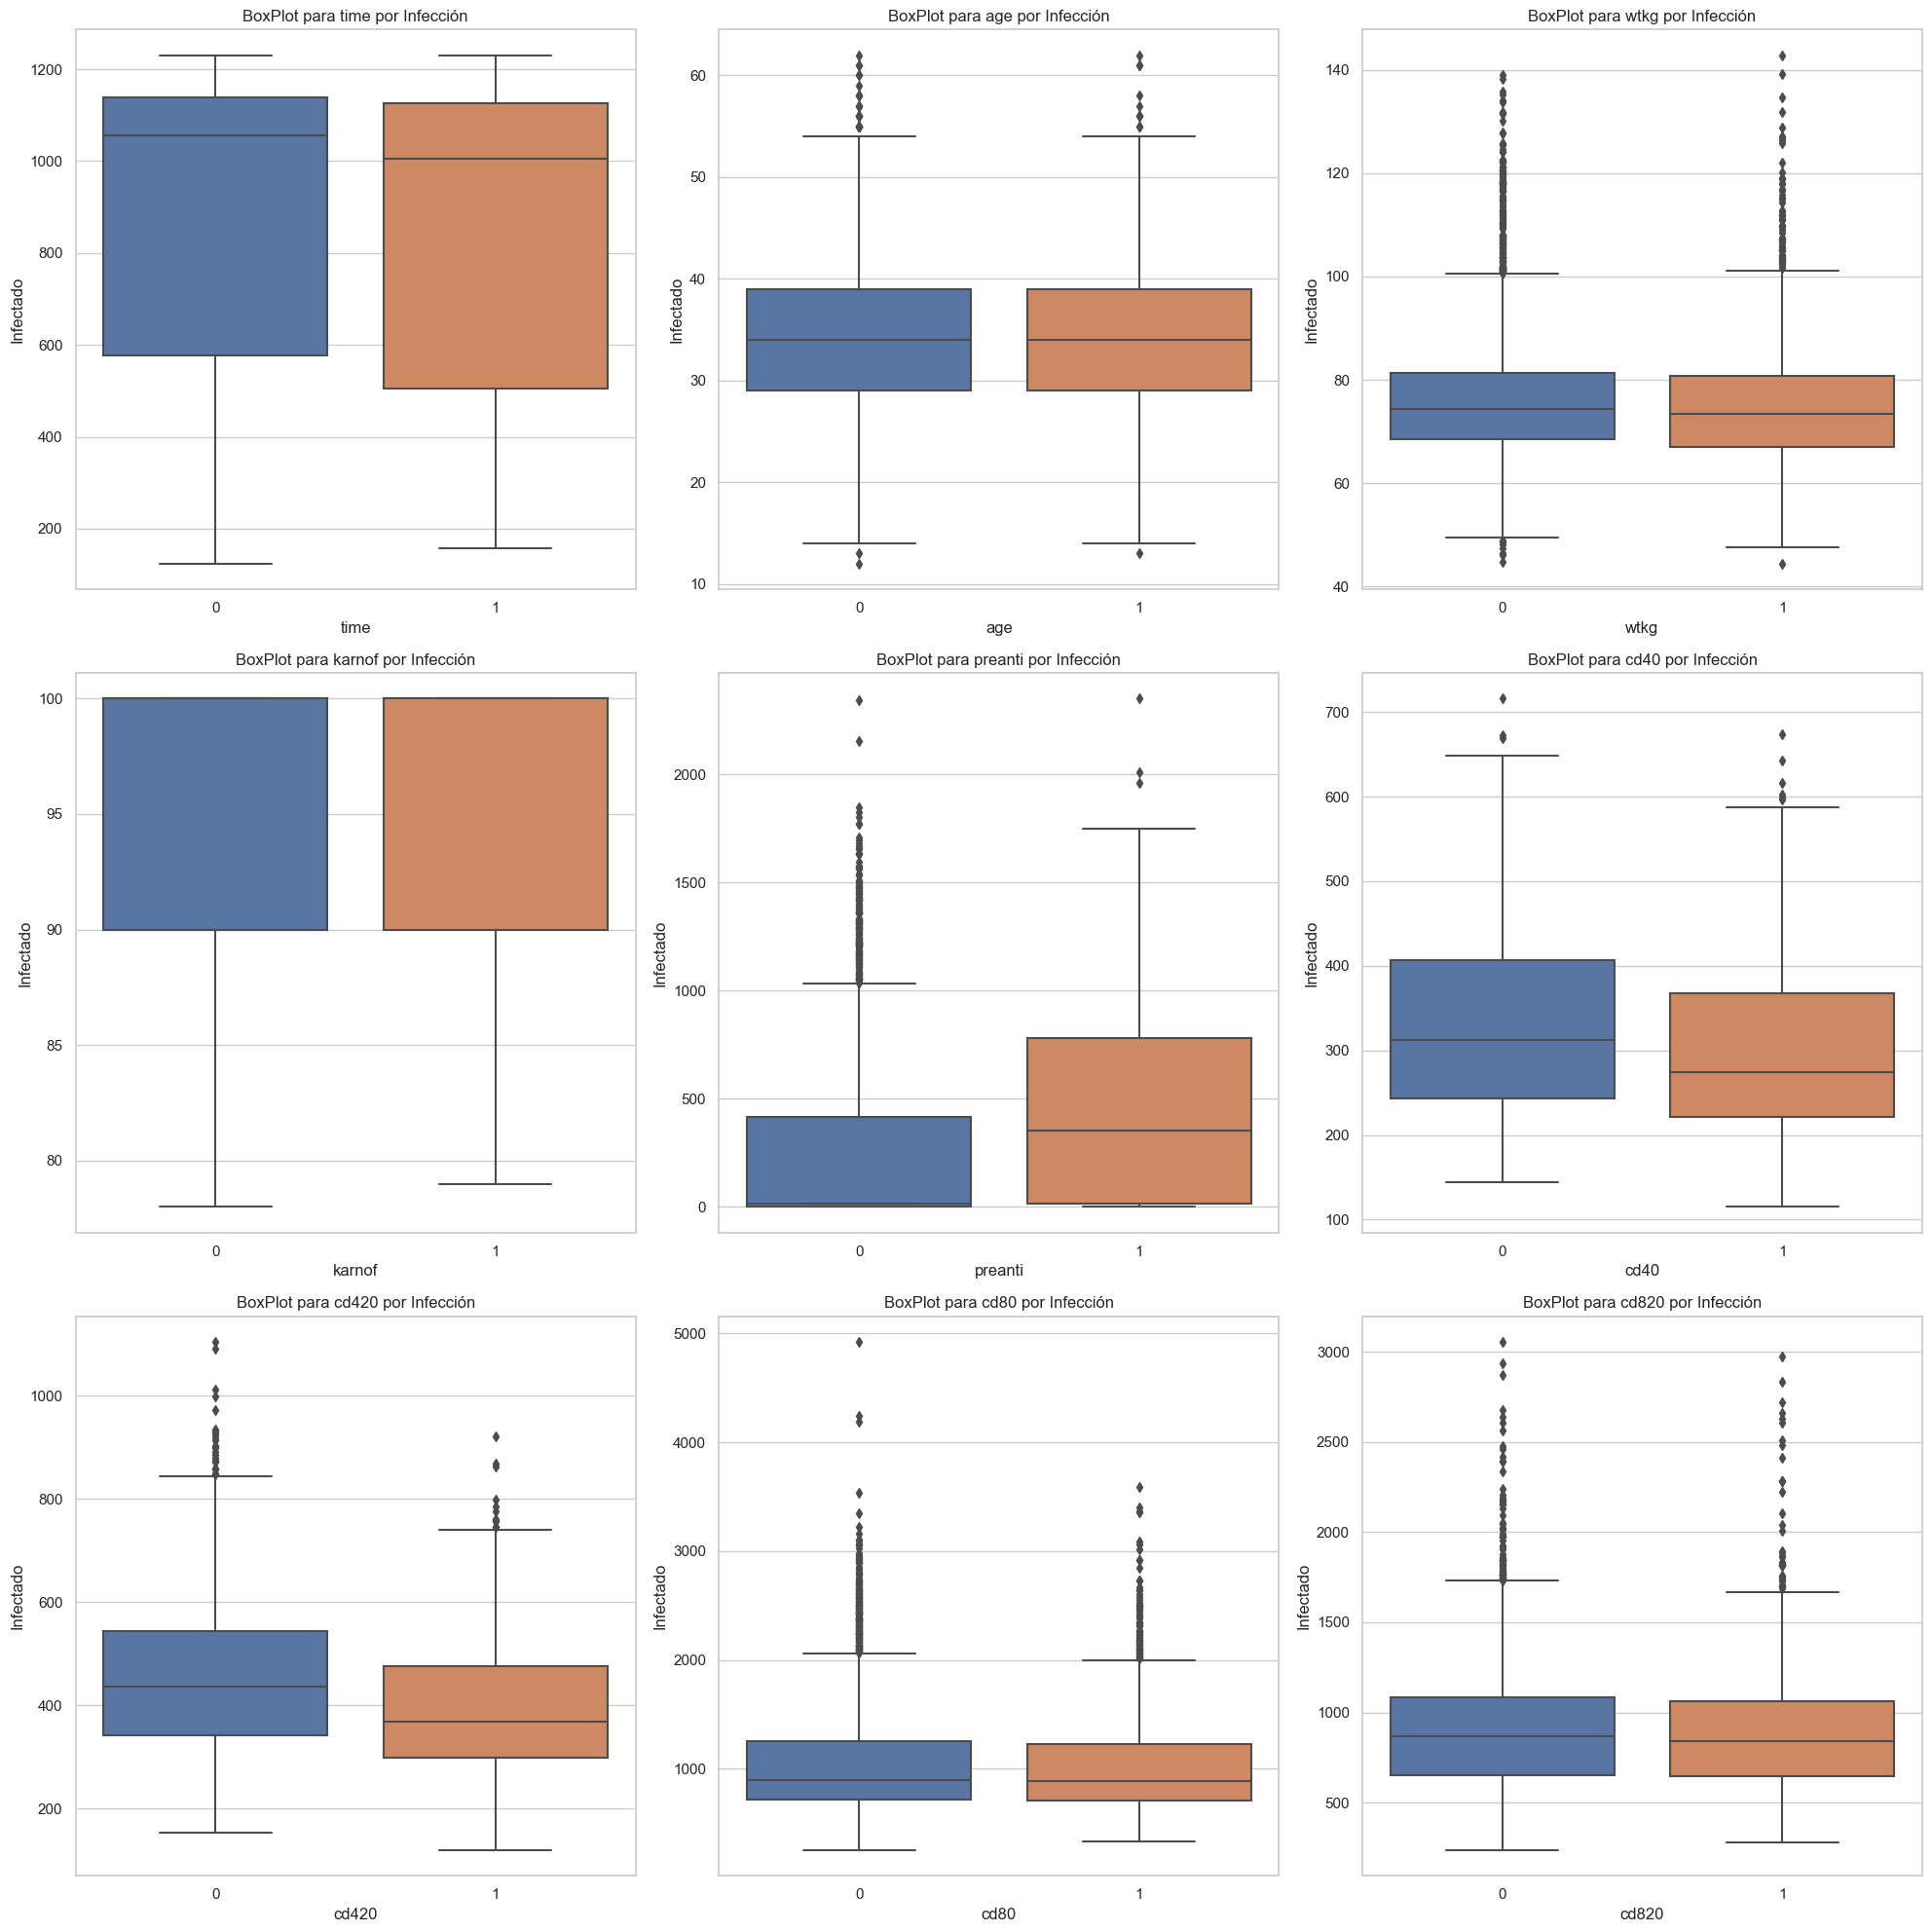

In [13]:
num_vars = len(var_continuas)
ncols = math.ceil(math.sqrt(num_vars))
nrows = math.ceil(num_vars / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
axes = axes.flatten()

for i, var in enumerate(var_continuas):
    sns.boxplot(data=data_aids, y=var , x='infected', ax=axes[i])
    axes[i].set_title(f'BoxPlot para {var} por Infección')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Infectado')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

Adicional a los histogramas, se realiza un gráfico con las variables continuas por las categorías de la variable 'infected', donde se logra evidenciar que, para algunas de ellas, a priori no se observa una diferencia marcada en su distribución. Por lo tanto, se podrían aplicar pruebas de hipótesis para la diferencia de medias de cada grupo y determinar su significancia estadística. Entre estas variables se encuentran 'cd80', 'wtkg' y 'age'.